# Dependencias

In [42]:
import seaborn as sns
from sentence_transformers import SentenceTransformer
sns.set_theme()
import sys
import os
ruta_carpeta = os.path.abspath('../src')
if ruta_carpeta not in sys.path:
    sys.path.append(ruta_carpeta)
import utileria as ut
from Graficos import graficos
from limpieza import limpieza_regex
from grafos import grafos

# Planos factoriales

In [43]:
terms = [
    'bueno',       
    'bien',        
    'aceptable',   
    'adecuado',    
    'virtuoso',    
    'justo',       
    'está bien',   
    'genial',      
    'increíble',   
    'excepcional', 
    'significativo', 
    'mejor',       
    'ok',           
    'bien',         
    'malo',         
    'horrible',     
    'peor',         
    'terrible',     
    'horrible',
]


In [45]:
model = SentenceTransformer('hackathon-pln-es/paraphrase-spanish-distilroberta')
modelos = ut.sentence_similarity(model,terms,3)

print(modelos.varianza_explicada())
print(modelos.componentes())

[20.465796   9.8596525  5.8638086]
[[ 3.7494967  -2.2132797  -0.16433708]
 [ 6.22035    -3.4253602  -0.6411207 ]
 [ 1.9704578   1.9698082   0.5390434 ]
 [ 1.7685657   3.1530282   1.4847636 ]
 [ 0.01687854  2.121734   -0.01587836]
 [ 3.6733444  -0.4909243   0.5878225 ]
 [ 5.250034   -1.966045   -1.1663748 ]
 [ 0.4705228   2.7727802   0.4252119 ]
 [-1.5312446   0.1931515  -7.4877996 ]
 [-1.9418479   8.3875475  -0.8562804 ]
 [ 1.590863    4.956796    1.5266682 ]
 [ 1.2118531  -0.18922874  1.4593962 ]
 [ 3.0275505  -1.3942869   0.8572038 ]
 [ 6.22035    -3.425359   -0.64112085]
 [-4.265202   -2.1137729   2.797721  ]
 [-7.326701   -1.9544508  -1.0109425 ]
 [-5.3472314  -2.4812176   5.0459075 ]
 [-7.431337   -1.9464719  -1.7289393 ]
 [-7.326701   -1.9544508  -1.0109422 ]]


In [46]:
cluster = modelos.k_means(3)
cluster.labels_

c:\Users\bcriv\miniconda3\envs\dydde\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1])

In [47]:
cluster.cluster_centers_[0]

array([ 0.44450602,  2.920702  , -0.36560932], dtype=float32)

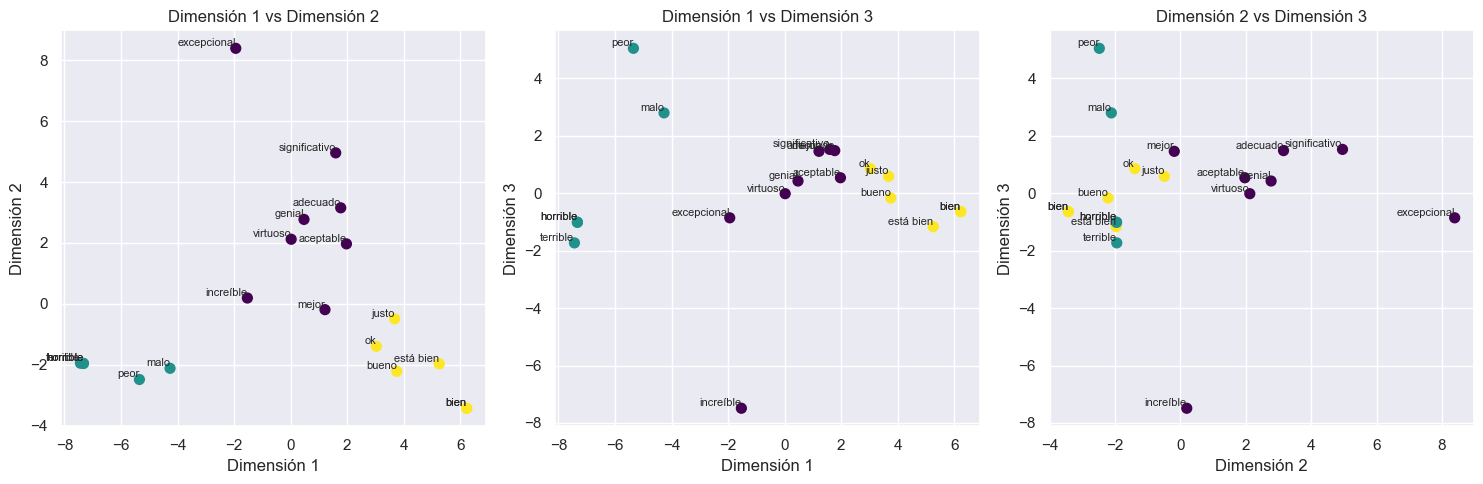

In [ ]:
graficos.plot_column_combinations(
    modelos.componentes(),   
    max_dim=3,               
    colors=cluster.labels_,  
    labels=terms             
)

In [18]:
with open('../input/palabras_vacias.txt', 'r') as file:
    stop_words = file.read().splitlines()

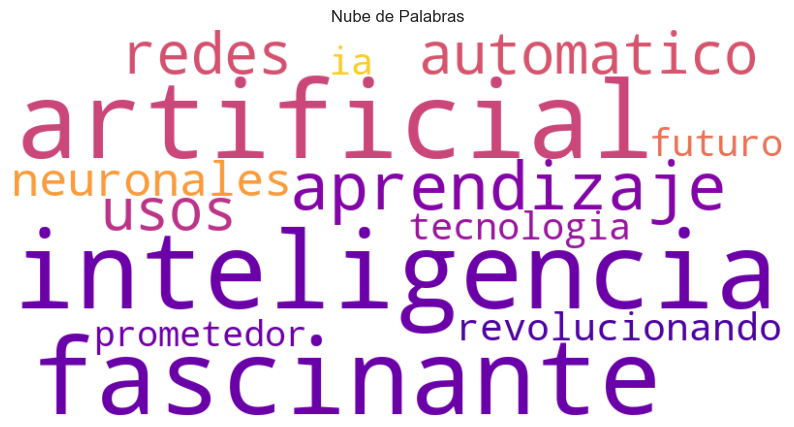

In [19]:
sentencias = [
    "La inteligencia artificial es fascinante.",
    "El aprendizaje automático tiene muchos usos.",
    "Las redes neuronales están revolucionando la tecnología.",
    "El futuro de la IA es prometedor."
]
sentencias = limpieza_regex.limpieza_de_textos(sentencias=sentencias)
sentencias = limpieza_regex.stop_words(stop_words,sentencias)
graficos.generar_wordcloud(sentencias,"plasma")


# analisis de sentimientos 

In [21]:
sent,pola = ut.analisis_sentimientos(terms)
print(sent)
print(pola)

[0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, -1, -1, 0, -1, -1]
[0.0, 0.7, 0.0, 0.5, 0.0, 0.7, 0.0, 0.9, 0.9, 0.6666666666666666, 0.375, 0.5, 0.5, 0.7, -0.6999999999999998, -1.0, -0.4, -1.0, -1.0]


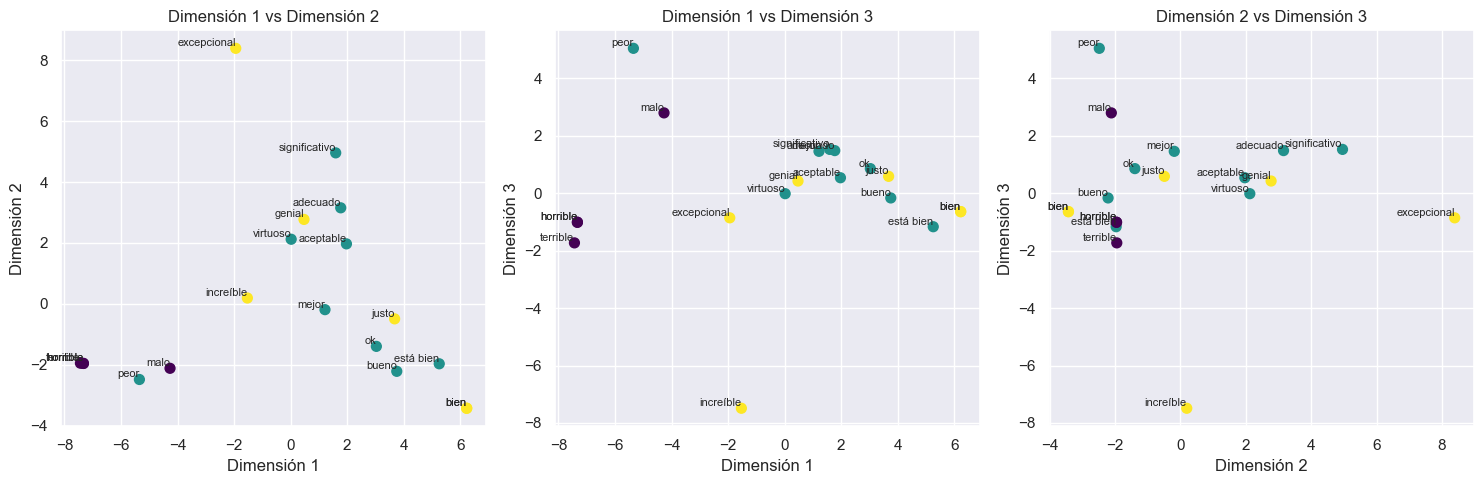

In [51]:
graficos.plot_column_combinations(
    modelos.componentes(),   # Coordenadas
    max_dim=3,               # Número de dimensiones a considerar
    colors=sent,  # Colores por cluster
    labels=terms             # Etiquetas de los puntos
)

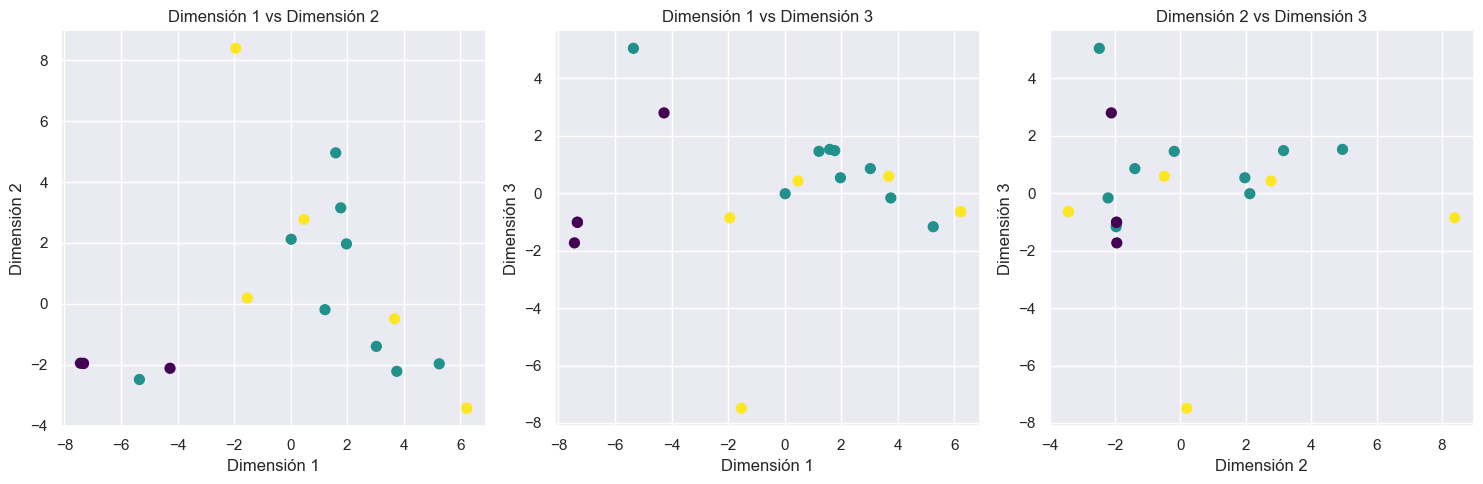

In [52]:
graficos.plot_column_combinations(modelos.componentes(),colors=sent)

# analisis de redes

In [53]:
texto = ["""Nicolás Maduro en un acto con militares. Foto:Presidencia de Venezuela/ AFP

Maduro afirma que hay "desinformación" y "noticias falsas" sobre la relación entre Estados Unidos y Venezuela. Menciona, específicamente, las "falsas acusaciones" que vinculan a altos funcionarios venezolanos con mafias y narcotráfico. 
El mandatario venezolano describe esto como la instancia "más atroz de desinformación" y sugiere que tiene la intención de justificar un conflicto armado "que causaría daños catastróficos en todo el continente". 
"Tuve una larga conversación con el Enviado Especial Rick Grenell (Richard Grenell) sobre este y otros temas. En ese sentido, le envío datos contundentes sobre la producción y el tráfico de drogas en Sudamérica. Estos datos demuestran de forma concluyente que Venezuela es un territorio libre de producción de drogas y un país sin relevancia en el ámbito de los narcóticos. Esto se debe al inmenso esfuerzo realizado durante años por nuestras fuerzas policiales y militares", dice la nota. 
Maduro dice en la carta que, según datos de la ONU y otras organizaciones, "el 87 % de la droga producida en Colombia se transporta a través de los puertos del Pacífico. El 8 % se envía a través de la región norte de la Guajira colombiana, y solo el 5 % intenta ser transportado a través de Venezuela. Sin embargo, toda la droga incautada a lo largo de los 2.200 kilómetros de frontera con Colombia es interceptada y destruida".
Y asegura que: "Este año ya hemos neutralizado y destruido más del 70 % de la pequeña cantidad de droga que intenta cruzar la frontera, que tiene más de 2.200 kilómetros de longitud. De acuerdo con la legislación venezolana, hemos destruido 402 aeronaves de tráfico internacional de drogas. Estos datos confirman el impecable historial de Venezuela en la lucha contra el narcotráfico internacional, como lo han expresado todas las organizaciones y agencias internacionales especializadas en la materia". 
Después de su firma, Maduro adjunta dos mapas explicando los datos anteriores."""]
texto = limpieza_regex.limpieza_de_textos(sentencias=texto)
texto = limpieza_regex.stop_words(stop_words,texto)

texto
bigramas = grafos.Generacion_de_skipgramas(texto[0],2,1)


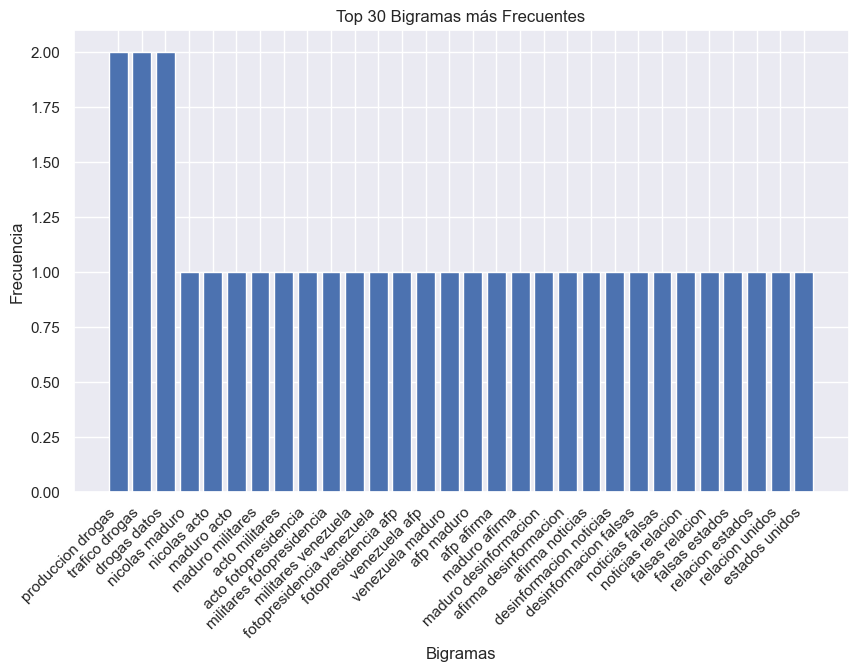

<module 'matplotlib.pyplot' from 'c:\\Users\\bcriv\\miniconda3\\envs\\dydde\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [38]:
grafos.plot_bigramas(bigramas,30)

In [54]:
bigramas = grafos.bigramas_para_grafo(bigramas,0)
g =  grafos.creacion_del_grafo(bigramas)

In [55]:
gigante = grafos.cluster_seleccion_componenteconexa_gigante(g,'../output/grafo_cph_texto_total_cluster.png','../output/grafo_cph_texto_total_cluster_comunidades.png')


Comunidad 0: Palabra más importante (según grado): maduro
Comunidad 1: Palabra más importante (según grado): venezuela
Comunidad 2: Palabra más importante (según grado): desinformacion
Comunidad 3: Palabra más importante (según grado): grenell
Comunidad 4: Palabra más importante (según grado): pais
Comunidad 5: Palabra más importante (según grado): droga
Comunidad 6: Palabra más importante (según grado): transporta


In [56]:
grafos.estadisticas_descriptivas(gigante)

{'diametro': 11,
 'nodo_mayor_grado': ['venezuela'],
 'grado_mayor': 20,
 'nodo_mayor_fuerza': 'venezuela',
 'fuerza_mayor': 20.0,
 'nodo_centralidad_closeness': 'venezuela',
 'nodo_centralidad_betweenness': 'venezuela',
 'nodo_centralidad_eigen': 'venezuela',
 'grado_promedio': 4.775862068965517,
 'clan_mas_grande': 4,
 'densidad': 0.04152923538230884}